# Ejercicio 1: Lectura y escritura de CSV

A. Lee el fichero de airport.csv a partir de una ruta relativa o absoluta.

B. Exporta ese fichero en diferentes formatos (json, excel).

C. Crea una función que pueda leer cualquiera de los tres formatos indicándole, al menos, la ruta del fichero

In [2]:
import csv
import os
import json
import pandas as pd

def open_csv(file_path):
    return pd.read_csv(file_path)

def export_json(file):
    root, _ = os.path.splitext(file)
    json_file_path = f"{root}.json"
    with open(file, encoding='utf-8') as csv_file_handler:
        csv_reader = csv.DictReader(csv_file_handler)
        data = [row for row in csv_reader]

    with open(json_file_path, 'w') as json_file: 
        json.dump(data, json_file, indent=4)

def csv_to_excel(csv_file_path):
    root, _ = os.path.splitext(csv_file_path)
    excel_file_path = f"{root}.xlsx"
    df = pd.read_csv(csv_file_path)
    df.to_excel(excel_file_path, sheet_name='Sheet1', index=False)

# C. Función para leer cualquiera de los tres formatos

def read_file(file_path, sheet_name='Sheet1'):
    root, ext = os.path.splitext(file_path)
    
    if ext == '.csv':
        return pd.read_csv(file_path)
    elif ext == '.json':
        return pd.read_json(file_path)
    elif ext == '.xlsx':
        return pd.read_excel(file_path, sheet_name=sheet_name)
    else:
        return "Unsupported file format"


file_path = 'airports.csv'
df = open_csv(file_path)
export_json(file_path)
csv_to_excel(file_path)

# Uso
df_csv = read_file('airports.csv')
df_json = read_file('airports.json')
df_excel = read_file('airports.xlsx')

# E2: Carga de fichero con variable categórica y crear modelo de clasificación

A. Descarga de la librería sklearn el fichero de datos de load_breast_cancer.

B. Pasa ese fichero a formato dataframe incluyendo el target

C. Crea un modelo de clasificación usando la técnica que prefieras dentro de Sklearn.

D. Evalúa el modelo.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 

dataset = load_breast_cancer()

df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target']= dataset.target
print(df.head())

#print(df.head())
#print(df.columns)

# Modelo de clasificación usando la técnica que prefieras
data, target = dataset.data, dataset.target
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.2, random_state=42)
# Partimos los datos entre test y train 

model = LogisticRegression()
model.fit(data_train, target_train)
target_pred = model.predict(data_test)

acc = accuracy_score(target_test, target_pred)
print(f"Accuracy Score: {acc}")

cm = confusion_matrix(target_test, target_pred)
print(f"Confusion Matrix: \n {cm}")
# Genial!

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. Crear modelo de clusterización 

A. Descarga el fichero de datos Wine Recognition Dataset de sklearn.

B. Crear varios modelos de clusterización (K-means, NearestNeighbort, DBSCAN, ...).

C. Evalua los clusters de cada modelo.

D. Visualiza los clusters de cada modelo.

E. Crea modelos de clasificación a partir de los clusters.

Optimal number of clusters based on silhouette score: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

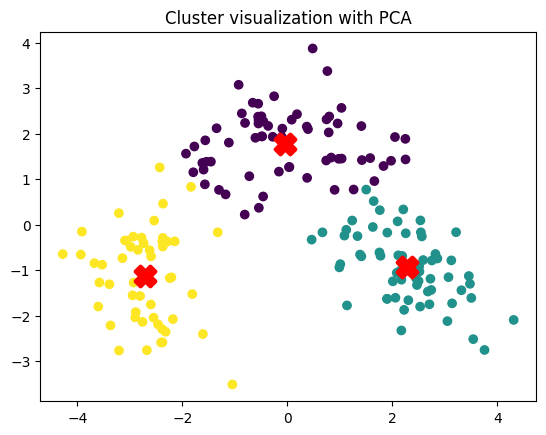

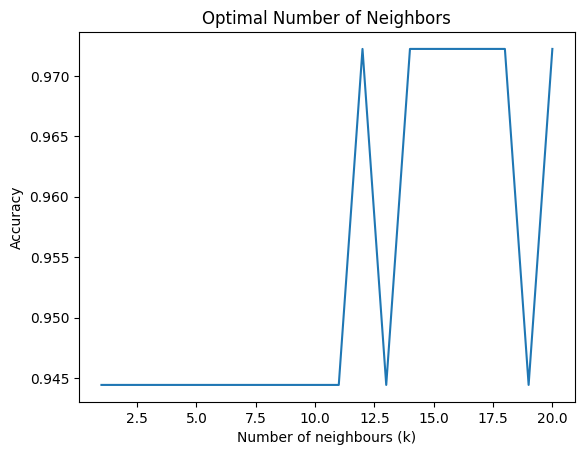

The optimal number of neighbors is 12 with accuracy of 0.97
Cross-validation scores: [0.94444444 0.94444444 0.94444444 0.94444444 1.         0.88888889
 1.         1.         0.94117647 1.        ]
Mean cross-validation score: 0.9607843137254901


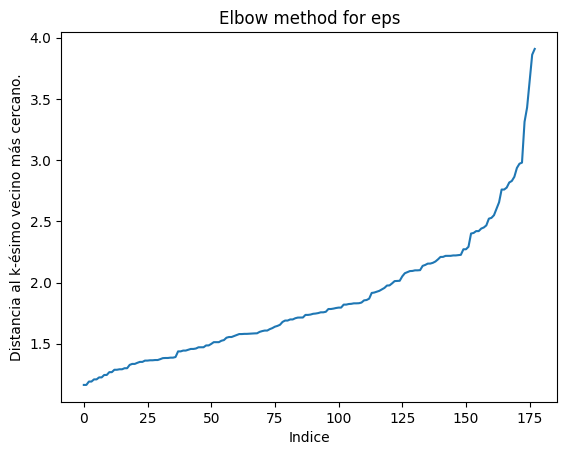

Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1 -1
  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


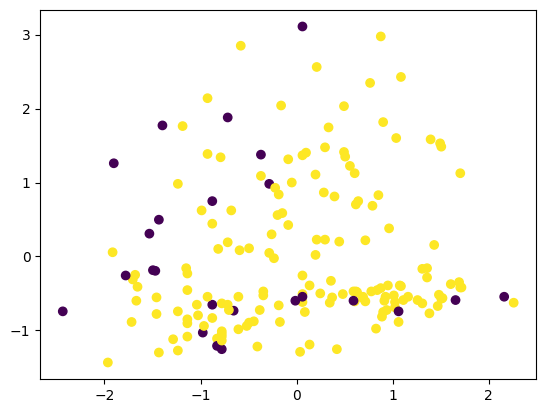

In [8]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset
dataset = load_wine()
data, target = dataset.data, dataset.target

# Escalamos las categorías para que todo cuadre y no haya sesgos de escala. 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tenemos dos opciones, podemos hallarlo con el metodo Elbow o las silhouette scores, por lo tanto...
# Tiramos por el silhouette score. 
silhouette_scores = []
k_rango_silhouette = range(2, 11)

for k in k_rango_silhouette:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

optimal_k_silhouette = k_rango_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on silhouette score: {optimal_k_silhouette}')

# Ejecutamos KMeans con el numero optimo de centroides
model = KMeans(n_clusters=optimal_k_silhouette)
model.fit(data_scaled)
labels = model.labels_
centroids = model.cluster_centers_

# Visualizacion usando PCA -> Util para cuando tenemos en consideración más de 2 dimensiones. 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
centroids_pca = pca.transform(centroids)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.title('Cluster visualization with PCA')
plt.show()

#### Modelo Numero 2 -> K Nearest Neighbour
# Para este si que hay que dividir los datos: 
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size = 0.2, random_state=42)

# Iniciamos el KNN con K = 3
accuracies = []
k_values = range(1,21)

for k in k_values: 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Encaja el model 
    knn_model.fit(data_train, target_train)
    #Haz predicciones con el conjunto test 
    target_pred = knn_model.predict(data_test)

    # Evaluamos el modelo 
    accuracy = accuracy_score(target_test, target_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Optimal Number of Neighbors')
plt.show() 


# Find the k value that gives the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"The optimal number of neighbors is {optimal_k} with accuracy of {max(accuracies):.2f}")

# Cross-Validation para verificar si la precision de 12 vecinos es over-fitting. 
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=12)
cv_scores = cross_val_score(knn_model, data_scaled, target, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Spoiler, no lo es. 

 
# Pasamos a DBCSCAN
# DBCSCAN es un algoritmo de agrupación basado en densidad.
# A comparación con K-Means, no hace falta especificar el número de cluster de antemano. 
'''Parametros Clave: 
    - eps: Radio de la vecinidad. 
    - minPts: Número mínimo de puntos requiridos para formar un cluster'''

# Metodo del codo para hallar el mejor valor de eps: 
n_neighbors = 2 
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn_model = nn.fit(data_scaled)

distances, indices = nn_model.kneighbors(data_scaled)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Indice')
plt.ylabel('Distancia al k-ésimo vecino más cercano.')
plt.title('Elbow method for eps')
plt.show()

#Esto la verdad es que no lo entiendo muy bien... 
dbscan = DBSCAN(eps = 2.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

#Ver los resultados 
print("Cluster labels:", labels)
# Visualización: 
plt.scatter(data_scaled[:,0], data_scaled[:, 1], c=labels)
plt.show()

# Ejercicio 5: Creación de un juego de datos sintéticos a partir de distribuciones estadísticas. 

## Reglas: 
El juego de datos se compondrá de las siguientes variables:
- Sexo: Categórica
- Peso: Numérica
- Estatura: Numérica
- BMI: Numérica

Suposiciones:

- El 49,0% del total de inscritos en el Padrón son hombres y el 51,0% mujeres.

- La estatura de los hombre sigue una distribución media de 179.3 y una desviación típica 7.0.

- La estatura de las mujeres sigue una distribución media de 176.3 y una desviación típica 6.6.

- El peso de los hombre sigue una distribución media de 78.9 y una desviación típica 11.8.

- El peso de las mujeres sigue una distribución media de 60.4 y una desviación típica 9.7.

- BMI = Peso / Estatura^2

-------------------------

## A programar:

A. Crea 100.000 individuos y sus variables.

B. Clusteriza sus BMIs y explora si existe una relación con: Bajo peso = menos de 18.5. Peso normal = 18.5–24.9. Sobrepeso = 25–29.9. Obesidad = BMI de 30 ó mayor

C. Crea un modelo de regresión que calcule el BMI.

D. Crea un modelo de clasificación que indique si una persona tiene sobrepeso o no.




In [10]:
import pandas as pd 
import numpy as np 

PLAYER_COUNT = 1000

base_df = pd.DataFrame({'Sexo': pd.Series(dtype='category'), 
                   'Peso': pd.Series(dtype='int'), 
                   'Estatura': pd.Series(dtype='int'), 
                   'BMI': pd.Series(dtype='int')})

# Reglas ahora aqui para rellenar el dataset
# 1. Un 49% del total inscritos son hombre, y el 51% mujeres. 
base_df['Sexo'] = np.random.choice(['Hombre', 'Mujer'], PLAYER_COUNT, p=[0.49, 0.51])
# 2. La estatura sigue uns distribucion normal con media 179.3, desviacion tipica 7.0
base_df['Estatura'] = np.where(
    base_df['Sexo'] == 'Hombre', 
    np.random.normal(179.3, 7.0, PLAYER_COUNT), # Distribucion del hombre
    np.random.normal(176.3, 6.6, PLAYER_COUNT)  # Distribucion de la mujer
)
# 3. Distribuciones del peso 
base_df['Peso'] = np.where(
    base_df['Sexo'] == 'Hombre', 
    np.random.normal(78.9, 11.8, PLAYER_COUNT), 
    np.random.normal(60.4, 9.7, PLAYER_COUNT)
)
# 4. BMI 
base_df['BMI'] = base_df['Peso'] / (base_df['Estatura']/100) ** 2

print(base_df.head())

    Sexo       Peso    Estatura        BMI
0  Mujer  50.315806  185.321471  14.650517
1  Mujer  53.893114  182.827503  16.123162
2  Mujer  75.679995  173.846953  25.040727
3  Mujer  64.999171  163.301142  24.374144
4  Mujer  86.167083  178.041688  27.183037


In [11]:
# Creamos una nueva instancia para que no se modifique la base de datos original
# Cuando dice clusterizar, se refiere a agrupar los BMI's y explora si hay una relación con: 
# Bajo peso, menos de 18.5, Peso normal = 18.5 -> 24.9, Sobrepeso = 25 -> 29.9, obesidad = 30 >= 
def categorizar_bmi(bmi):
    if bmi < 18.5: 
        return 'Bajo peso'
    elif 18.5 <= bmi < 24.9: 
        return 'Peso normal'
    elif 24.9 <= bmi < 29.9:
        return 'Sobrepeso'
    else: 
        return 'Obesidad'
    
base_df['Categoria_BMI'] = base_df['BMI'].apply(categorizar_bmi)
print(base_df.head())

    Sexo       Peso    Estatura        BMI Categoria_BMI
0  Mujer  50.315806  185.321471  14.650517     Bajo peso
1  Mujer  53.893114  182.827503  16.123162     Bajo peso
2  Mujer  75.679995  173.846953  25.040727     Sobrepeso
3  Mujer  64.999171  163.301142  24.374144   Peso normal
4  Mujer  86.167083  178.041688  27.183037     Sobrepeso


In [13]:
agrupado = base_df.groupby(['Categoria_BMI', 'Sexo']).size().reset_index(name='Cantidad')
print(agrupado)

  Categoria_BMI    Sexo  Cantidad
0     Bajo peso  Hombre        30
1     Bajo peso   Mujer       186
2      Obesidad  Hombre        62
3   Peso normal  Hombre       193
4   Peso normal   Mujer       304
5     Sobrepeso  Hombre       189
6     Sobrepeso   Mujer        36


In [16]:
# Crea un modelo de regresion que calcule el BMI. 
# Es por lo cual vamos a hacer una regresión lineal 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

df_target = base_df['BMI']
df_target.columns = 'BMI'
df_target.head()

# Okay entonces, vamos allá con la metodologia
# 1. Seleccion de variables indeps 
# 2. Dividison del conjunto de datos 80:20
# 3. Escalado de Variables, pero no parece ser muy necesario aqui
# 4. Entrenamiento y evaluacion 
# 5. Ajuste del modelo e implementacion 

# La hacemos categorica de manera numerica. 
base_df['Sexo'] = base_df['Sexo'].map({'Hombre':0, 'Mujer': 1})
# Selección de variables
X = base_df[['Sexo', 'Peso', 'Estatura']]
y = base_df['BMI']

# Dividimos los datos: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

# Entrenamiento del Modelo 
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones 
y_pred = modelo.predict(X_test)

# Evaluacion del Modelo 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 score: {r2}")

Mean Squared Error: 0.1316437935016432
R^2 score: 0.9939013181858617


In [19]:
# Y ahora tenemos que montar un modelo de clasificación que indique si una persona tiene sobrepeso o no: 
# Pasos para implementar el modelo de clasificacion: 
# 1. Definimos la variable objetivo 
base_df['Sobrepeso'] = (base_df['BMI']>= 25).astype(int)

# 2. Variables 
X = base_df[['Sexo', 'Peso', 'Estatura']]
y = base_df['Sobrepeso']

# 3. Division de conjunto de datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
# Entrenamos el modelo logistico 
classif_model = LogisticRegression()
classif_model.fit(X_train, y_train)

# Predicciones 
y_pred = classif_model.predict(X_test)

# Evaluate the model
precision = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Model precision: {precision}")
print(f"Model Confusion Matrix: \n {cm}")


# Cross-Validation to verify that the model isn't overfit: 
cv_scores = cross_val_score(classif_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)

print(f"Mean CV accuracy: {mean_cv_score}")
# Nice no hay overfitting. Finito!!

Model precision: 0.995
Model Confusion Matrix: 
 [[141   1]
 [  0  58]]
Mean CV accuracy: 0.9962499999999999
